## ¿Me concederán la tarjeta?

Los bancos comerciales reciben muchas solicitudes de tarjetas de crédito. Muchos de ellos son rechazados por muchas razones, como saldos elevados de préstamos, bajos niveles de ingresos  por ejemplo. El análisis manual de estas aplicacionespropenso a errores y requiere mucho tiempo . Afortunadamente, esta tarea se puede automatizar con el poder del aprendizaje automático y prácticamente todos los bancos comerciales lo hacen hoy en día. En este proyecto, construiremos un predictor automático de aprobación de tarjetas de crédito utilizando técnicas de aprendizaje automático que hemos trabajado anteriormente (Regresión logísitica y KNN), tal como lo hacen los bancos reales.

## INSPECCIÓN DEL DATASET

Carga el Dataset del moodle e inspecciona los valores ( es normal que te resulte confuso)

In [53]:
# Tu codigo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libreria para el manejo de datos

Al ser datos privados los han capados, pero 'feta la llei, feta la trampa', tenemos este [blog](http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html) que nos da una idea de a que campos se pueden referir: Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income y finalmente el ApprovalStatus.

Se mezclan tanto campos numéricos como textos, así que seguramente vamos a tener que hacer algunas transformaciones:

In [54]:
    # Analiza la info del dataset (tamaño y tipos de columnas)

    df = pd.read_csv('data/dataCredit.csv', sep=';')
    df

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16
0,b,30.83,0,u,g,w,v,125,t,t,1,f,g,00202,0,+
1,a,58.67,446,u,g,q,h,304,t,t,6,f,g,00043,560,+
2,a,24.50,5,u,g,q,h,15,t,f,0,f,g,00280,824,+
3,b,27.83,154,u,g,w,v,375,t,t,5,t,g,00100,3,+
4,b,20.17,5625,u,g,w,v,171,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10085,y,p,e,h,125,f,f,0,f,g,00260,0,-
686,a,22.67,75,u,g,c,v,2,f,t,2,t,g,00200,394,-
687,a,25.25,135,y,p,ff,ff,2,f,t,1,t,g,00200,1,-
688,b,17.92,205,u,g,aa,v,4,f,f,0,f,g,00280,750,-


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Column1   690 non-null    object
 1   Column2   690 non-null    object
 2   Column3   690 non-null    int64 
 3   Column4   690 non-null    object
 4   Column5   690 non-null    object
 5   Column6   690 non-null    object
 6   Column7   690 non-null    object
 7   Column8   690 non-null    int64 
 8   Column9   690 non-null    object
 9   Column10  690 non-null    object
 10  Column11  690 non-null    int64 
 11  Column12  690 non-null    object
 12  Column13  690 non-null    object
 13  Column14  690 non-null    object
 14  Column15  690 non-null    int64 
 15  Column16  690 non-null    object
dtypes: int64(4), object(12)
memory usage: 86.4+ KB


In [56]:
# Analiza la descripción estadísitca de los campos numéricos del dataset (saca alguna conclusió TIP: fijate en la escalas)
df.describe()

,Column3,Column8,Column11,Column15
count,690.000000,690.000000,690.00000,690.000000
mean,1187.315942,453.366667,2.40000,1017.385507
std,3069.110042,1387.900324,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,15.000000,5.000000,0.00000,0.000000
50%,125.000000,35.000000,0.00000,5.000000
75%,665.000000,219.750000,3.00000,395.500000
max,26335.000000,14415.000000,67.00000,100000.000000


## Tratamiento de valores Nulos

Normalmente cuando faltan campos en un dataset se suele dejar vacío, lo que equivale a introducir el valor NaN, en algunos casos como en este ejemplo, podemos observar como en alguna variable categorica envez de de dejarlo vacío han puesto ?.

In [57]:
# Observa si hay columnas que contengan valor ?
df = df.replace('?', np.nan)

In [58]:
# Reemplaza el valor ? por un (NaN)
df = df.replace('?', np.nan)

In [59]:
#Muestra la cantidad de NaN
df.isnull().sum().sum()

67

Para tratar los NaN values hay una serie de técnicas, desde descartarlos, o en nuestro caso los vamos a rellenar con el valor medio:

In [60]:
# Rellena los NaN Values con el valor medio y muestra el número de NaN
df = df.fillna(df.mean())
print(df.isnull().sum().sum())

67


C:\Users\1vict\AppData\Local\Temp\ipykernel_7072\3599206723.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [61]:
df.isna().sum()

Column1     12
Column2     12
Column3      0
Column4      6
Column5      6
Column6      9
Column7      9
Column8      0
Column9      0
Column10     0
Column11     0
Column12     0
Column13     0
Column14    13
Column15     0
Column16     0
dtype: int64

Como puede ver siguen habiendo NaN, tiene sentido debido a que en las variables categóricas no se ha podido imputar ninguna valor medio. Trata los campos categóricos para substuir los valores NaN por el valor que se da más veces. (Te va a costar haciendo un for (aunque tiene nivel para hacerlo), puedes optar por hacerlo uno a uno)

In [62]:
# Sacar el valor que mas se repite en las columnas y reemplazar los NaN por ese valor
df = df.fillna(df.mode().iloc[0])
#Muestra ahora el número de NaN
df.isnull().sum().sum()

0

## Preprocesado de datos

Lo primero que debemos hacer es separar en nuestra variable explicativa y nuestra variable target

<AxesSubplot: xlabel='Column16', ylabel='count'>

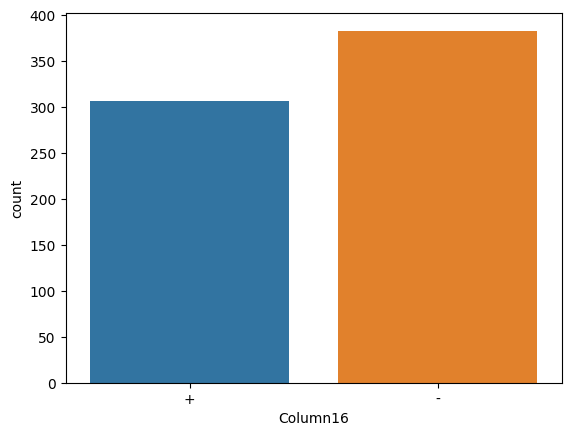

In [63]:
# Separa en dos df distintos
df1 = df[df['Column16'] == '+']
df2 = df[df['Column16'] == '-']
# De la variable target muestra gáficamente (barras), una comparación entre las tarjetas aprobadas y las que no.
sns.countplot(x='Column16', data=df)

No tener las variables del mismo tipo, da problemas tanto en tiempos de ejecución como en el resultado depende del modelo a aplicar. Así que transformemos la vairable categóricas en numéricas:
Puedes usar el [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) o el [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) 

In [68]:
# Transforma variable y muestra dataset
# OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder


for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])


df.apply(LabelEncoder().fit_transform)


,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16
0,1,156,0,1,0,12,7,35,1,1,1,0,0,68,0,0
1,0,328,79,1,0,10,3,54,1,1,6,0,0,11,119,0
2,0,89,5,1,0,10,3,14,1,0,0,0,0,96,140,0
3,1,125,51,1,0,12,7,58,1,1,5,1,0,31,3,0
4,1,43,158,1,0,12,7,42,1,0,0,0,2,37,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,52,175,2,2,4,3,35,0,0,0,0,0,90,0,1
686,0,71,35,1,0,1,7,2,0,1,2,1,0,67,106,1
687,0,97,48,2,2,5,2,2,0,1,1,1,0,67,1,1
688,1,20,60,1,0,0,7,4,0,0,0,0,0,96,134,1


## Separamos en train y test

In [69]:
# Mediante train_test_split separa las dos variable (un 30% de test y pon random_state=2 para que podamos comparar resultados)
from sklearn.model_selection import train_test_split

# train_test_split separa las dos variable (un 30% de test y pon random_state=2 para que podamos comparar resultados)
x_train, x_test, y_train, y_test = train_test_split(df.drop('Column16', axis=1), df['Column16'], test_size=0.3, random_state=2)

# Aplicamos ML

## Logistic regresion

Usa la libreria de scikit-learn para regresión logística. Ten en cuenta que las variable no están escaladas y en la regresión logística te afectará.


In [73]:
# Escala las varaibles de entramiento con MinMaxEscale y almacenalas en una variable nueva
from sklearn.preprocessing import MinMaxScaler

x_train_scaled = MinMaxScaler().fit_transform(x_train)
x_test_scaled = MinMaxScaler().fit_transform(x_test)

y_train_scaled = MinMaxScaler().fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = MinMaxScaler().fit_transform(y_test.values.reshape(-1,1))


In [104]:
# Entrena el modelo con las variables escaladas
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_scaled, y_train_scaled)

model.score(x_test_scaled, y_test_scaled)



c:\Users\1vict\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8888888888888888

In [100]:
# Muestra su accuracy
from sklearn import metrics

cm = metrics.confusion_matrix(y_test_scaled, model.predict(x_test_scaled))

print('Accuracy: ', metrics.precision_score(y_test_scaled, model.predict(x_test_scaled)))


Accuracy:  0.8942307692307693
True Positives:  91


In [82]:
# Muestra accuracy haciendo Cross validation (5 veces es suficiente)
from sklearn.model_selection import cross_val_score

pred = cross_val_score(model, x_test_scaled, y_test_scaled, cv=5)

print('Accuracy: ', pred.mean())

Accuracy:  0.8843205574912891


c:\Users\1vict\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1vict\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1vict\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1vict\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

### KNN

In [98]:
# Mediante GridSearch determina el número de vecinos optimos ( ya no hace falta usar variables escaladas)
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_opt = KNeighborsClassifier()
param = {'n_neighbors': np.arange(1, 15)}
knn_gscv = GridSearchCV(knn_opt, param, cv=30)

knn_gscv.fit(df.drop('Column16', axis=1), df['Column16'])


print(knn_gscv.best_params_)
print(knn_gscv.best_score_)
print('Accuracy: ', knn_gscv.score(x_test, y_test))

{'n_neighbors': 3}
0.6782608695652174
Accuracy:  0.8019323671497585


In [99]:
# Muestra accuracy haciendo Cross validation (5 veces es suficiente)
knn_opt = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_opt, df.drop('Column16', axis=1), df['Column16'], cv=5)

print('Accuracy: ', cv_scores.mean())

Accuracy:  0.6565217391304348


## Conclusiones

Determina el mejor modelo y guardatelo para futuros análisis y atender las peticiones futuras de usuarios que quieren tarjetas de créditos. (Brutal el proyecto)

In [107]:
#Exporta modelo
import pickle
filenameRL = 'models/modelRegresionLogistica.sav'
filenameKNN = 'models/modelKNN.sav'
pickle.dump(model, open(filenameRL, 'wb'))
pickle.dump(knn_gscv, open(filenameKNN, 'wb'))